# 520 Data Mining - Data Exploration and Mining Methods Proposal

## Import Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import seaborn as sns

## Read Raw Data

In [5]:
field_data = pd.read_csv('Most-Recent-Cohorts-Field-of-Study.csv')

In [6]:
field_data.sample()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_WNE_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_PELL_NE_3YR,EARN_PELL_NE_MDN_3YR,EARN_COUNT_NOPELL_NE_3YR,EARN_NOPELL_NE_MDN_3YR,EARN_COUNT_MALE_NE_3YR,EARN_MALE_NE_MDN_3YR,EARN_COUNT_NOMALE_NE_3YR,EARN_NOMALE_NE_MDN_3YR
206394,450933.0,41215,Columbia Southern University,"Private, for-profit",1,1507,Quality Control and Safety Technologies/Techni...,3,Bachelors Degree,661.0,...,382,368,344,69511,110,81655,330,77991,124,58876


In [7]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224849 entries, 0 to 224848
Columns: 121 entries, UNITID to EARN_NOMALE_NE_MDN_3YR
dtypes: float64(3), int64(4), object(114)
memory usage: 207.6+ MB


In [8]:
institution_data = pd.read_csv('Most-Recent-Cohorts-Institution.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663

In [9]:
institution_data .sample()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
6234,16061203,202406,2024,Southeastern Louisiana University - Destrahan ...,Destrehan,LA,700474002,Southern Association of Colleges and Schools C...,www.southeastern.edu/,NaN,...,1615.0,46257.0,0.6922,39476.0,41981.0,44579.0,41838.0,41313.0,38432.0,49518.0


In [10]:
institution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Columns: 2989 entries, UNITID to MD_EARN_WNE_MALE1_P10
dtypes: float64(798), int64(17), object(2174)
memory usage: 151.9+ MB


1. Present a simple statistical exploration of your data (correlations, standard deviations, means, medians). Also explore your data visually using methods such as histograms, scatterplots ,heat maps, box and whisker plots...)



## Data Visualization 

### Institution



#### 1. Number of institutions in each state


Text(0, 0.5, 'Number')

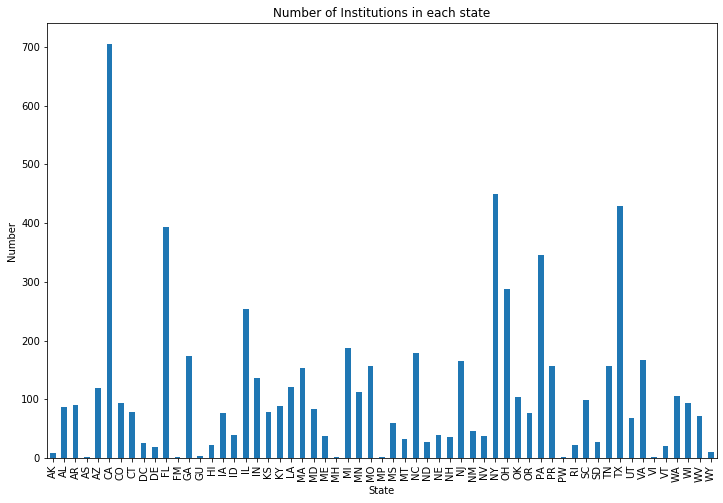

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
institution_data.groupby(['STABBR'])['UNITID'].count().plot(kind = 'bar')
plt.title('Number of Institutions in each state')
plt.xlabel('State')
plt.ylabel('Number')

Obviously, there are more institutions located in CA，FL, IL, NY, PA and TX.

#### 2. Heat map of unemployment rate by degree and region

In [12]:
institution_data['UNEMP_RATE'] = pd.to_numeric(institution_data['UNEMP_RATE'], errors='coerce')

In [13]:
region_map = {0:"U.S. Service Schools",
1:"New England",
2:"Mid East",
3: "Great Lakes",
4: "Plains",
5: "Southeast",
6: "Southwest",
7: "Rocky Mountains",
8: "Far West",
9: "Outlying Areas"
             }

In [14]:
institution_data['REGIONDESC'] = institution_data['REGION'].map(region_map)

In [15]:
degree_map ={
0:"Non-degree-granting",
1:"Certificate degree",
2:"Associate degree",
3: "Bachelor's degree",
4:"Graduate degree"
}

In [16]:
institution_data['DEGREEDESC'] = institution_data['HIGHDEG'].map(degree_map)

In [17]:
df = pd.pivot_table(institution_data, values='UNEMP_RATE', index=['REGIONDESC'], columns=['DEGREEDESC'], aggfunc=np.mean)

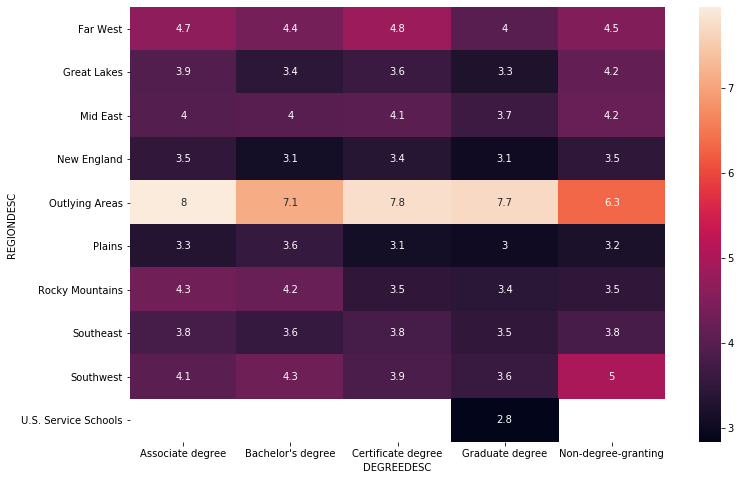

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df, annot=True)

The unemployed rate is relative to the location of this institution and the degree it provides. 

#### 3. Admission rate by region

In [19]:
institution_data.groupby(['REGION'])['ADM_RATE'].mean()

REGION
0    0.150700
1    0.672125
2    0.708370
3    0.726317
4    0.731039
5    0.708173
6    0.721288
7    0.803029
8    0.698881
9    0.729283
Name: ADM_RATE, dtype: float64

Text(0, 0.5, 'Adm Rate')

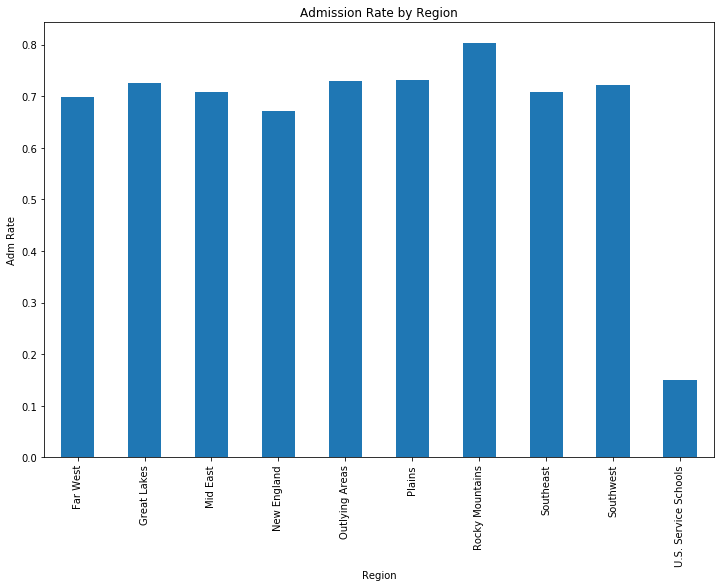

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
institution_data.groupby(['REGIONDESC'])['ADM_RATE'].mean().plot(kind = 'bar')
plt.title('Admission Rate by Region')
plt.xlabel('Region')
plt.ylabel('Adm Rate')


#### 4. ACT SAT average score by region


In [21]:
institution_data['SAT_MID'] = institution_data['SATVRMID']+institution_data['SATMTMID']+institution_data['SATWRMID']

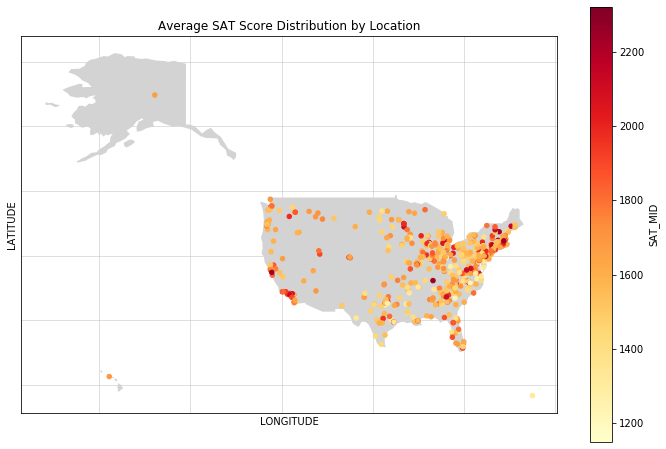

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# initialize an axis
fig, ax = plt.subplots(figsize=(12,8))


# plot points
institution_data.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", c="SAT_MID",
        colormap="YlOrRd", ax=ax, zorder=15)


countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax, legend=False, legend_kwds={'shrink': 0.1}, zorder=10)


# add grid
ax.grid(b=True, alpha=0.5)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
# cb=plt.colorbar()
# cb.remove() 
plt.title('Average SAT Score Distribution by Location')

plt.show()

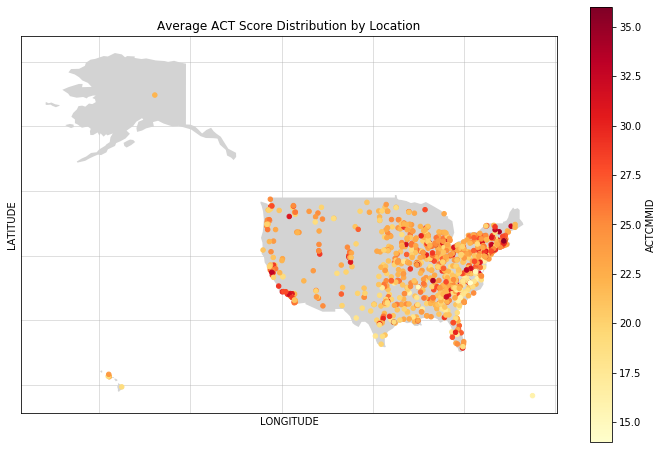

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# initialize an axis
fig, ax = plt.subplots(figsize=(12,8))


# plot points
institution_data.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", c="ACTCMMID", #act_scores.midpoint.cumulative
        colormap="YlOrRd", ax=ax, zorder=15)


countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax, legend=False, legend_kwds={'shrink': 0.1}, zorder=10)


# add grid
ax.grid(b=True, alpha=0.5)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
# cb=plt.colorbar()
# cb.remove() 
plt.title('Average ACT Score Distribution by Location')

plt.show()

From the ACT/SAT score distribution map, high scores are mainly concentrated in California and New York.

#### 5. The debt amount ratio between graduated student and non-graduated student by state

In [24]:
institution_data["GRAD_DEBT_MDN"] = pd.to_numeric(institution_data.GRAD_DEBT_MDN, errors='coerce')
institution_data["WDRAW_DEBT_MDN"] = pd.to_numeric(institution_data.WDRAW_DEBT_MDN, errors='coerce')
institution_data["DEBT_ratio_GRAD_over_WDRAW"] = institution_data["GRAD_DEBT_MDN"]/institution_data["WDRAW_DEBT_MDN"]
#The median debt for students who have completed

In [25]:
debt_by_state = pd.DataFrame(institution_data.groupby(['STABBR'])['DEBT_ratio_GRAD_over_WDRAW'].mean())
debt_by_state.reset_index(inplace=True)
#debt_by_state.plot(kind = 'bar', figsize=(16, 12))
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


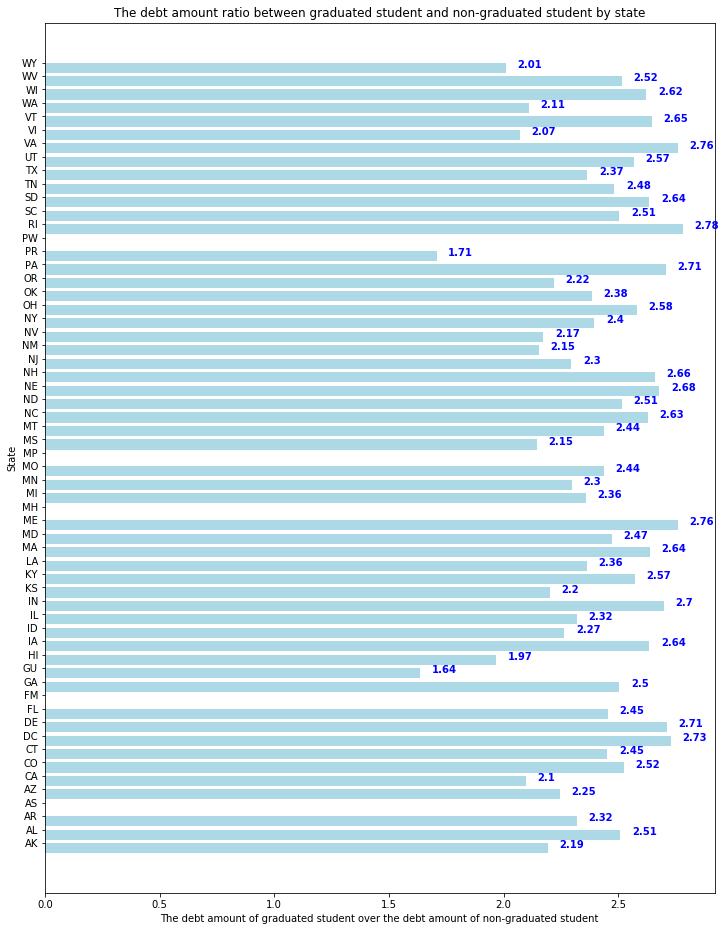

In [26]:
x = debt_by_state['STABBR']
y = debt_by_state['DEBT_ratio_GRAD_over_WDRAW']

fig, ax = plt.subplots(figsize=(12, 16))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="lightblue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('The debt amount ratio between graduated student and non-graduated student by state')
plt.xlabel('The debt amount of graduated student over the debt amount of non-graduated student')
plt.ylabel('State')      
for i, v in enumerate(y):
    ax.text(v + 0.05, i , str(round(v,2)), color='blue', fontweight='bold')
plt.show()


#### 6. Correlations between family income and tuition fees

In [27]:
institution_data['FAMINC'] = pd.to_numeric(institution_data['FAMINC'], errors='coerce')
institution_data['MD_FAMINC'] = pd.to_numeric(institution_data['MD_FAMINC'], errors='coerce')
institution_data['TUITIONFEE_IN'] = pd.to_numeric(institution_data['TUITIONFEE_IN'], errors='coerce')
institution_data['TUITIONFEE_OUT'] = pd.to_numeric(institution_data['TUITIONFEE_OUT'], errors='coerce')
#MD_FAMINC #Average family income Median family income

In [28]:
df = institution_data[['TUITIONFEE_IN','FAMINC']] #In-state tuition and fees
df.corr()

,TUITIONFEE_IN,FAMINC
TUITIONFEE_IN,1.000000,0.714766
FAMINC,0.714766,1.000000


In [29]:
df = institution_data[['TUITIONFEE_OUT','FAMINC']] #Out-of-state tuition and fees
df.corr()

,TUITIONFEE_OUT,FAMINC
TUITIONFEE_OUT,1.000000,0.795696
FAMINC,0.795696,1.000000


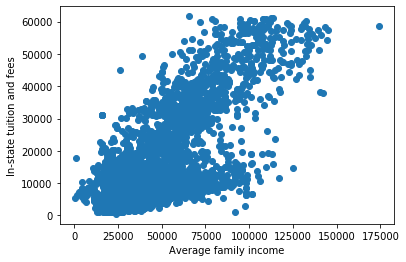

In [31]:
y = institution_data['TUITIONFEE_IN']
x = institution_data['FAMINC']
plt.xlabel('Average family income')
plt.ylabel('In-state tuition and fees')  
plt.scatter(x, y)
plt.show()

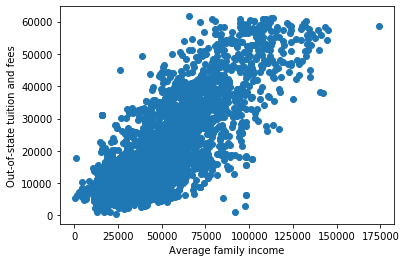

In [32]:
y = institution_data['TUITIONFEE_OUT']
x = institution_data['FAMINC']
plt.xlabel('Average family income')
plt.ylabel('Out-of-state tuition and fees')  
plt.scatter(x, y)
plt.show()

For each institution, required tuition for in-state and out-of-state students is related to the average household income in the area.

### Field

#### 1. Earning by fields of study.


In [9]:
field_data['CIPLEVEL'] = [str(x)[:2] if len(str(x)) == 4 else str(x)[:1] for x in field_data['CIPCODE']]

In [10]:
CIP_map ={'1':"Agriculture, Agriculture Operations, and Related Sciences ", '3':"Natural Resources and Conservation", 
          '4':"Architecture and Related Services", '9':"Communication, Journalism, and Related Programs", 
          '10':"Communications Technologies/Technicians and Support Services",'11':"Computer and Information Sciences and Support Services ", 
          '13':"Education", '14':"Engineering", '15':"Engineering Technologies and Engineering-Related Fields", '19':"Family and Consumer Sciences/Human Sciences", 
          '23':"English Language and Literature/Letters", '24':"Liberal Arts and Sciences, General Studies and Humanities",
       '26':"Biological and Biomedical Sciences", '27':"Mathematics and Statistics ", '31':"Parks, Recreation, Leisure, and Fitness Studies",
          '40':"Physical Sciences ", '42':"Psychology ", '43':"Homeland Security, Law Enforcement, Firefighting and Related Protective Service", 
          '44':"Public Administration and Social Service Professions", '45':"Social Sciences", '50':"Visual and Performing Arts", 
          '51':"Health Professions and Related Programs", '52':"Business, Management, Marketing, and Related Support Services",
       '5':"Area, Ethnic, Cultural, Gender, and Group Studies ", '16':"Foreign Languages, Literatures, and Linguistics", 
          '30':"Multi/Interdisciplinary Studies", '38':"Philosophy and Religious Studies", '41':"Science Technologies/Technicians", 
          '54':"History", '39':"Theology and Religious Vocations", '22':"Legal Professions and Studies", '25':"Library Science", 
          '12':"Personal and Culinary Services", '47':"Mechanic and Repair Technologies/Technicians",
       '48':"Precision Production", '32':"Basic Skills and Developmental/Remedial Education", '49':"Transportation and Materials Moving", 
          '46':"Construction Trades", '29':"Military Technologies and Applied Sciences", '36':"Leisure and Recreational Activities", 
          '53':"High School/Secondary Diplomas and Certificates", '34':"Health-Related Knowledge and Skills", '60':"Residency Programs", 
          '61':"Orthopedic Surgery Residency/Fellowship Programs", '28':"Military Science, Leadership and Operational Art",'33':"Citizenship Activities ", 
          '37':"Personal Awareness and Self-Improvement", '35':"Interpersonal and Social Skills", '21':"Technology Education/Industrial Arts Program"}


In [11]:
field_data['CIPLEVELDESC'] = field_data['CIPLEVEL'].map(CIP_map)

In [12]:
#EARN_MDN_HI_1YR, EARN_MDN_HI_2YR, EARN_NE_MDN_3YR,EARN_MALE_NE_MDN_3YR
field_data['EARN_MDN_HI_1YR'] = pd.to_numeric(field_data['EARN_MDN_HI_1YR'], errors='coerce')
field_data['EARN_NE_MDN_3YR'] = pd.to_numeric(field_data['EARN_NE_MDN_3YR'], errors='coerce')
field_data['EARN_MALE_NE_MDN_3YR'] = pd.to_numeric(field_data['EARN_MALE_NE_MDN_3YR'], errors='coerce')
field_data['EARN_NOMALE_NE_MDN_3YR'] = pd.to_numeric(field_data['EARN_NOMALE_NE_MDN_3YR'], errors='coerce')

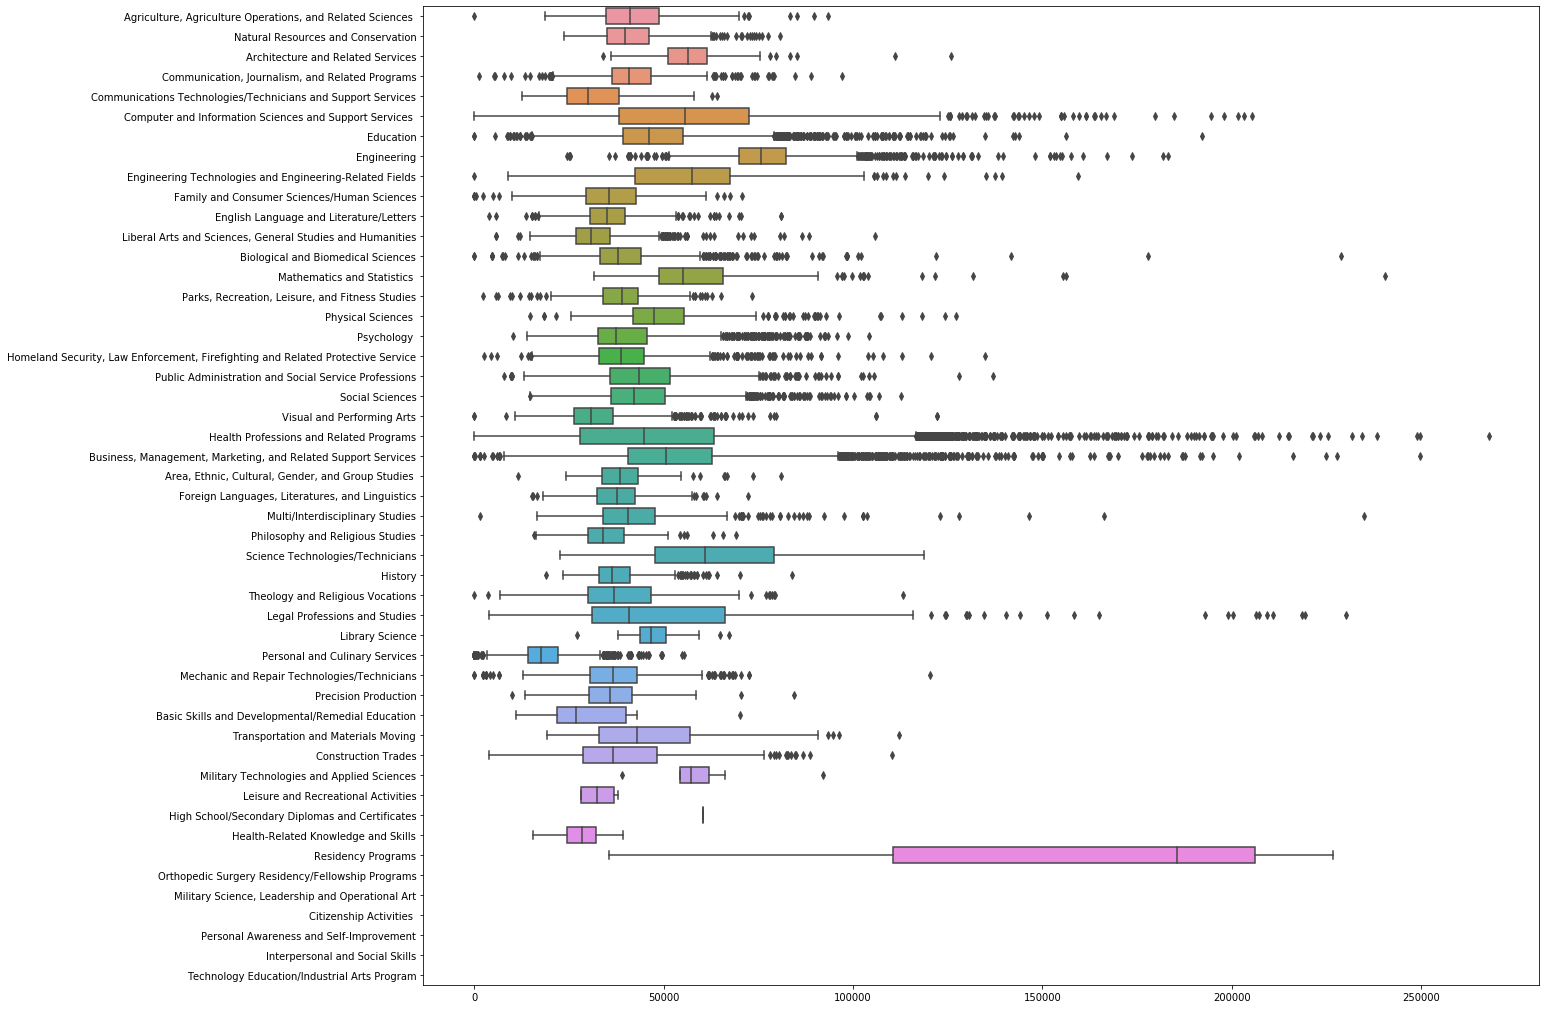

In [13]:
plt.figure(figsize=(20,18))
data = {"domain": list(field_data['CIPLEVELDESC']),
        "score": list(field_data['EARN_NE_MDN_3YR'])}
ax = sns.boxplot(x="score", y="domain", data=data)

Obviously, the average earnings of students graduating from Residency Programs jumped out significantly, and besides that, average earnings in technology or engineering-related fields were higher than in other fields.

#### 2. Mean debt amount by fields of study.

In [17]:
field_data['DEBT_ALL_PP_ANY_MEAN'] = pd.to_numeric(field_data['DEBT_ALL_PP_ANY_MEAN'], errors='coerce')
field_data['DEBT_ALL_PP_ANY_MDN'] = pd.to_numeric(field_data['DEBT_ALL_PP_ANY_MDN'], errors='coerce')
#DEBT_ALL_PP_ANY_MEAN
#DEBT_ALL_PP_ANY_MDN

In [18]:
def map_score(level):
    if level == 'Bachelors Degree':
        return 'Bachelor'
    elif level == "Master's Degree":
        return "Master"
    elif level == 'Doctoral Degree' or level == 'First Professional Degree':
        return "Doctor" 
    else:
        return "Certificate"

field_data['DEGREE'] = field_data['CREDDESC'].apply(lambda level: map_score(level))

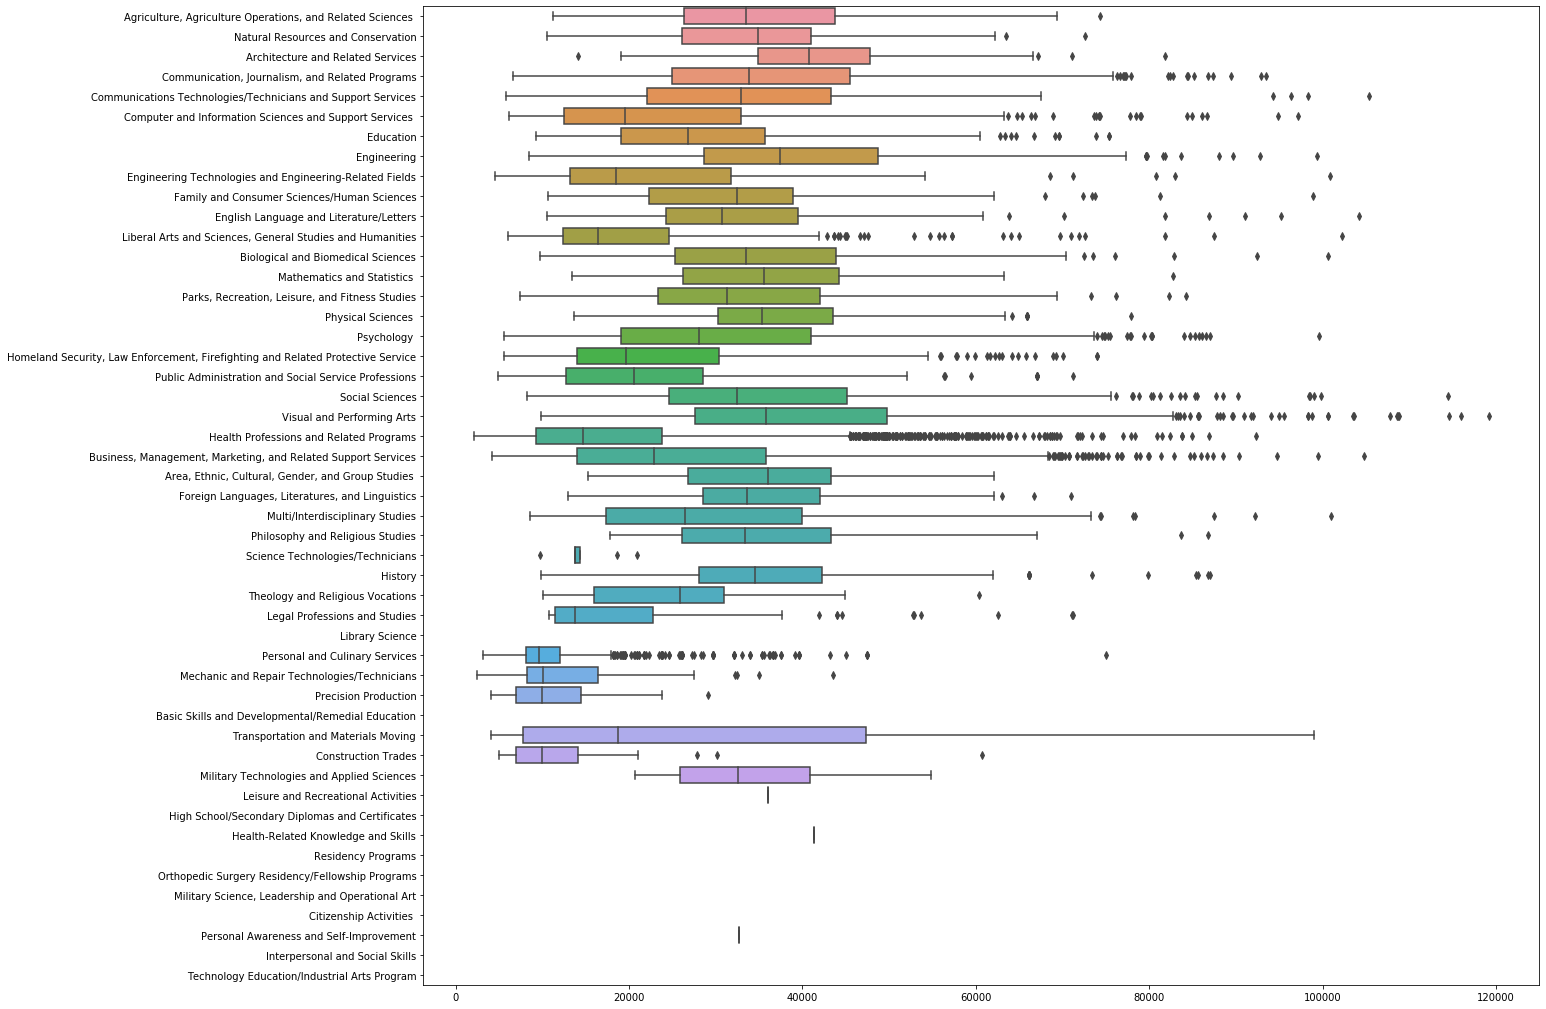

In [19]:
plt.figure(figsize=(20,18))
data = {"domain": list(field_data['CIPLEVELDESC']),
        "score": list(field_data['DEBT_ALL_PP_ANY_MEAN'])}
ax = sns.boxplot(x="score", y="domain", data=data)

The debt amount for Architecture and Arts is higher than other fields of study.

#### 3. Average earning by gender.


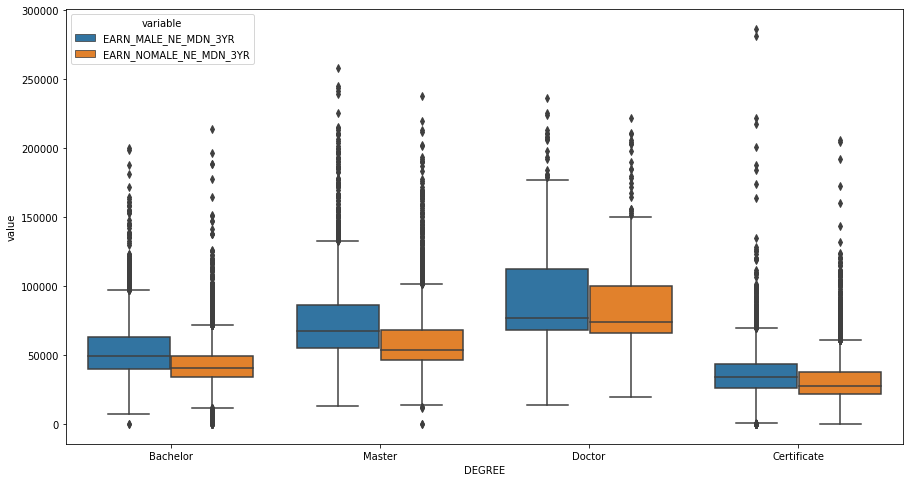

In [21]:
plt.figure(figsize=(15,8))
df_plot = field_data.melt(id_vars='DEGREE', value_vars=['EARN_MALE_NE_MDN_3YR','EARN_NOMALE_NE_MDN_3YR'])
sns.boxplot(x='DEGREE', y='value', hue='variable', data=df_plot)


#fig, ax = plt.subplots(figsize=(10,8))
#field_data.boxplot(column=[['EARN_MDN_HI_1YR','EARN_NE_MDN_3YR']], by='CREDDESC', ax=ax)


Across all degress, the average earning for male is higher than female.


In [22]:
# remove redundant features
selected_list = ['UNITID','OPEID6','INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC','CREDLEV', 'CREDDESC'
]

#### 4. Data statistical exploration

In [29]:
debt_list = ['DEBT_ALL_PP_ANY_MEAN','DEBT_MALE_PP_ANY_MDN',
                  'DEBT_MALE_PP_ANY_MEAN', 'DEBT_NOTMALE_PP_ANY_MEAN','DEBT_NOTMALE_PP_ANY_MDN']
earning_list = ['EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_WNE_HI_1YR','EARN_MDN_HI_1YR','EARN_CNTOVER150_HI_1YR','EARN_COUNT_NWNE_HI_2YR',
                  'EARN_COUNT_WNE_HI_2YR','EARN_MDN_HI_2YR','EARN_CNTOVER150_HI_2YR',
                  'EARN_COUNT_NE_3YR','EARN_NE_MDN_3YR','EARN_COUNT_WNE_3YR','EARN_COUNT_MALE_NE_3YR',
                'EARN_MALE_NE_MDN_3YR','EARN_COUNT_NOMALE_NE_3YR','EARN_NOMALE_NE_MDN_3YR']

In [23]:
numerical_list = ['IPEDSCOUNT1','IPEDSCOUNT2', 'DEBT_ALL_PP_ANY_MEAN','DEBT_MALE_PP_ANY_MDN',
                  'DEBT_MALE_PP_ANY_MEAN', 'DEBT_NOTMALE_PP_ANY_MEAN','DEBT_NOTMALE_PP_ANY_MDN',
                 'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_WNE_HI_1YR','EARN_MDN_HI_1YR','EARN_CNTOVER150_HI_1YR','EARN_COUNT_NWNE_HI_2YR',
                  'EARN_COUNT_WNE_HI_2YR','EARN_MDN_HI_2YR','EARN_CNTOVER150_HI_2YR',
                  'EARN_COUNT_NE_3YR','EARN_NE_MDN_3YR','EARN_COUNT_WNE_3YR','EARN_COUNT_MALE_NE_3YR',
                'EARN_MALE_NE_MDN_3YR','EARN_COUNT_NOMALE_NE_3YR','EARN_NOMALE_NE_MDN_3YR'
                 ]

In [27]:
for col in numerical_list:
    field_data[col] = pd.to_numeric(field_data[col], errors='coerce')

In [30]:
field_data[debt_list].describe()

,DEBT_ALL_PP_ANY_MEAN,DEBT_MALE_PP_ANY_MDN,DEBT_MALE_PP_ANY_MEAN,DEBT_NOTMALE_PP_ANY_MEAN,DEBT_NOTMALE_PP_ANY_MDN
count,17433.000000,2461.000000,4668.000000,4704.000000,2464.000000
mean,26227.327540,25954.648923,29164.723865,28228.177934,25542.021104
std,16462.110028,16635.009493,16613.684118,16870.938191,17164.112693
min,2134.000000,2556.000000,3296.000000,3591.000000,2848.000000
25%,13042.000000,13434.000000,15794.000000,14173.750000,12706.000000
50%,22722.000000,22533.000000,27067.000000,25310.500000,22156.000000
75%,35294.000000,34754.000000,38739.500000,38085.750000,34191.000000
max,119130.000000,142182.000000,129411.000000,111598.000000,114566.000000


For all the debt related fields, the mean of Parent PLUS loan debt disbursed at all institutions (by gender) is around 26,000 to 28,000, and standard deviation is around 16600.

In [31]:
field_data[earning_list].describe()

,EARN_COUNT_NWNE_HI_1YR,EARN_COUNT_WNE_HI_1YR,EARN_MDN_HI_1YR,EARN_CNTOVER150_HI_1YR,EARN_COUNT_NWNE_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_MDN_HI_2YR,EARN_CNTOVER150_HI_2YR,EARN_COUNT_NE_3YR,EARN_NE_MDN_3YR,EARN_COUNT_WNE_3YR,EARN_COUNT_MALE_NE_3YR,EARN_MALE_NE_MDN_3YR,EARN_COUNT_NOMALE_NE_3YR,EARN_NOMALE_NE_MDN_3YR
count,155411.000000,54524.000000,54524.000000,48210.000000,60153.000000,60153.000000,60153.000000,60153.000000,48378.000000,48378.000000,48378.000000,25076.000000,25076.000000,34851.000000,34851.000000
mean,2.899666,117.694006,42450.799685,106.174901,7.069955,100.311938,41988.155703,81.985819,140.093638,47047.696308,121.285026,84.305152,52562.298532,124.357292,44138.392098
std,15.197484,332.922651,20143.213673,303.446720,28.400919,341.709109,20203.225646,295.136583,432.194055,22473.219252,376.940961,246.896394,24291.926971,341.059473,21411.264533
min,0.000000,16.000000,4880.000000,16.000000,0.000000,11.000000,5938.000000,0.000000,16.000000,0.000000,16.000000,16.000000,0.000000,16.000000,0.000000
25%,0.000000,25.000000,28308.000000,25.000000,0.000000,18.000000,28309.000000,15.000000,29.000000,32482.000000,25.000000,23.000000,36617.500000,26.000000,30081.500000
50%,0.000000,45.000000,37989.000000,43.000000,1.000000,33.000000,37208.000000,27.000000,50.000000,42644.000000,43.000000,37.000000,47912.000000,45.000000,40182.000000
75%,2.000000,99.000000,52365.000000,92.000000,4.000000,75.000000,51273.000000,63.000000,110.000000,57308.500000,95.000000,71.000000,64408.250000,98.000000,53059.000000
max,1166.000000,8342.000000,248696.000000,7757.000000,940.000000,9437.000000,248619.000000,8315.000000,11004.000000,267734.000000,9505.000000,4901.000000,286628.000000,7813.000000,238082.000000


## 2. Propose a data mining method covered in the class to apply on your data.

I plan to use K-mean to cluster different institutions based on academical profile of students enrolled, info about financial aid, graduated students earning, college completion and retention rate, etc.